## Observations and Insights 

- From the selected treatments Capomulin seems to reduce the size of tumors more effectively. 

- The correlation between mouse weight and average tumor volume on the capomulin regimen is 0.77. This shows that when the mouse weight increases the average tumor volume also increases. 

- Of the 4 drug regimens analyzed, Capomulin and Ramicane were the most effective at decreasing tumor size. The least effective were the other two drugs Infubinol and Ceftamin.

- The least effective drugs were Infubinol and Ceftamin.

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
study = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [119]:
# Checking the number of mice.

mice_df = study["Mouse ID"].count()

mice_df


1893

In [120]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_duplicate = study[study.duplicated(["Mouse ID", "Timepoint"])]

mice_duplicate.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [121]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dups = study[study.duplicated(["Mouse ID"])]

all_dups.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [122]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_dups = all_dups.drop_duplicates("Mouse ID").reset_index()

cleaned_dups.head()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,1,k403,Ramicane,Male,21,16,5,38.825898,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,21,x401,Capomulin,Female,16,15,5,45.473753,0
3,31,m601,Capomulin,Male,22,17,5,41.408591,1
4,41,g791,Ramicane,Male,11,16,5,45.851531,0


In [123]:
# Checking the number of mice in the clean DataFrame.

count_check = cleaned_dups["Mouse ID"].count()
count_check

237

## Summary Statistics

In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumormean = study.groupby("Drug Regimen") ["Tumor Volume (mm3)"].mean()
tumormedian = study.groupby("Drug Regimen") ["Tumor Volume (mm3)"].median()
tumorvar = study.groupby("Drug Regimen") ["Tumor Volume (mm3)"].var()
tumorstandard_dev= study.groupby("Drug Regimen") ["Tumor Volume (mm3)"].std()
tumorsem = study.groupby("Drug Regimen") ["Tumor Volume (mm3)"].sem()

sum_df = pd.DataFrame({"Mean": tumormean, "Median": tumormedian, "Variance": tumorvar, "Standard Deviation": tumorstandard_dev, "SEM": tumorsem})

sum_df




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

aggregation = study.groupby ("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std", "sem"]})
aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

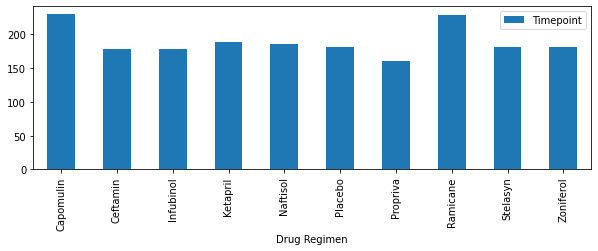

<Figure size 432x288 with 0 Axes>

In [126]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugdata = pd.DataFrame(study.groupby(["Drug Regimen"]).count()).reset_index()
drugdata_df = drugdata[["Drug Regimen", "Timepoint"]]
drugdata_df = drugdata_df.set_index("Drug Regimen")

drugdata_df.plot(kind="bar", figsize=(10,3))

plt.title = ("Drug Regimen Timepoints")
plt.show()
plt.tight_layout()




Text(0, 0.5, 'Total Count')

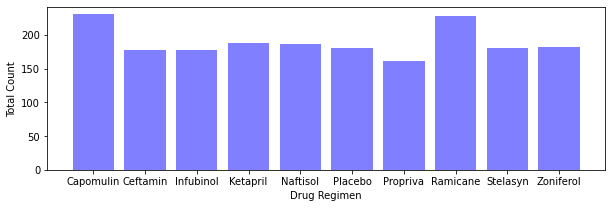

In [127]:
# #Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_list = sum_df.index.tolist()
count = (study.groupby(["Drug Regimen"]) ["Age_months"].count()).tolist()
#list
#count

x_axis = np.arange(len(count))
x_axis = drug_list
plt.figure(figsize=(10,3))
plt.bar(x_axis, count, color="b", alpha = 0.5, align="center")
plt.title = ("Drug Regimen Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Count")




Text(0, 0.5, '')

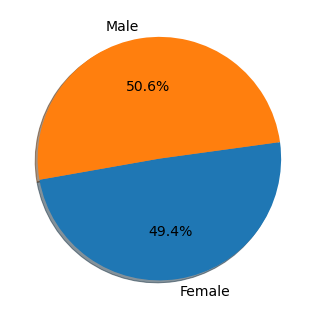

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Generate dataframe needed for pie plot 
gender_df = pd.DataFrame(study.groupby(["Sex"]).count()).reset_index()

# Bring dataframe down to two columns 
gender_df = gender_df[["Sex", "Mouse ID",]]

#Coding the Pie Plot 

plt.figure(figsize = (12,6))
axis1 = plt.subplot(121, aspect="equal")
gender_df.plot( kind = "pie", y = "Mouse ID", ax=axis1, autopct="%1.1f%%", startangle=190, shadow=True, labels= gender_df["Sex"], legend = False, fontsize = 14)

plt.title = "Percentage by Gender"
plt.xlabel("")
plt.ylabel("")



(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

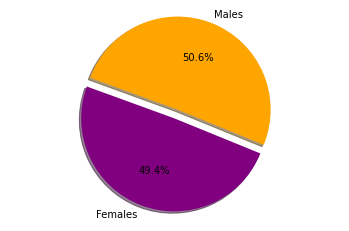

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

count_gender = (study.groupby(["Sex"]) ["Age_months"].count()).tolist()

#Plot Details 

labels = ["Females", "Males"]
colors = ["Purple", "Orange"]
explode = (0.1, 0)

# Making the pie plot 

plt.pie (count_gender, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")




## Quartiles, Outliers and Boxplots

In [130]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_time = study.groupby(["Mouse ID"]) ["Timepoint"].max()
max_time

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [131]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_merge = pd.merge(max_time, study, on = (["Mouse ID", "Timepoint"]))



tumor_merge_df = pd.DataFrame(tumor_merge)
tumor_merge_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [132]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

 # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    regimen = tumor_merge.loc[tumor_merge["Drug Regimen"] == treatment]
    tumor_volume = tumor_merge["Tumor Volume (mm3)"]
    
# Append tumor data to new list 
tumor_vol_data.append(tumor_volume)


In [133]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
capomulin_df = cleaned_dups.loc[cleaned_dups["Drug Regimen"] == "Capomulin", :]
ramicane_df = cleaned_dups.loc[cleaned_dups["Drug Regimen"] == "Ramicane", :]
infubinol_df = cleaned_dups.loc[cleaned_dups["Drug Regimen"] == "Infubinol", :]
ceftamin_df = cleaned_dups.loc[cleaned_dups["Drug Regimen"] == "Ceftamin", :]
 

In [134]:
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin

Capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, cleaned_dups, on=("Mouse ID","Timepoint"),how="left")
#Capomulin_merge.head()



In [135]:
#Capomulin Calculations

Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 43.1809774
The upper quartile of Capomulin tumors: 45.76088647
The interquartile range of Capomulin tumors: 2.5799090699999994
The median of Capomulin tumors: 45.59706359 
Values below 39.311113795000004 could be outliers.
Values above 49.630750075 could be outliers.


In [136]:
# Calculations for Ramicane

Ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, cleaned_dups, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 42.99887638
The upper quartile of Ramicane tumors is: 45.62580225
The interquartile range of Ramicane tumors is: 2.626925870000001
The median of Ramicane tumors is: 45.52187471 
Values below 39.058487575 could be outliers.
Values above 49.566191055000004 could be outliers.


In [137]:
# Infubinol Calculations

Infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, cleaned_dups, on=("Mouse ID","Timepoint"),how="left")
#Infubinol_merge.head()

Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Infubinol tumors is: 46.05193075
The upper quartile of Infubinol tumors is: 47.35388938
The interquartile range of Infubinol tumors is: 1.3019586300000014
The median of Infubinol tumors is: 46.87048256 
Values below 44.098992804999995 could be outliers.
Values above 49.306827325 could be outliers.


In [138]:
#Ceftamin Calculations

Ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, cleaned_dups, on=("Mouse ID","Timepoint"),how="left")
#Ceftamin_merge.head()

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin Tumors is: {lowerq}")
print(f"The upper quartile of Ceftamin Tumors is: {upperq}")
print(f"The interquartile range of Ceftamin Tumors is: {iqr}")
print(f"The the median of Ceftamin Tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




The lower quartile of Ceftamin Tumors is: 45.80908882
The upper quartile of Ceftamin Tumors is: 46.79925591
The interquartile range of Ceftamin Tumors is: 0.9901670899999999
The the median of Ceftamin Tumors is: 46.37079759 
Values below 44.323838185 could be outliers.
Values above 48.284506545 could be outliers.


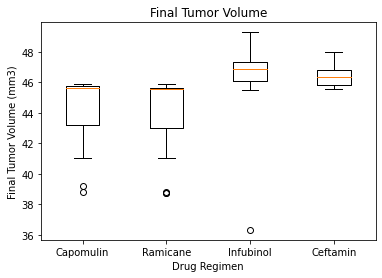

In [139]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plot_data = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(plot_data, labels = labels, widths = 0.4)
plt.show()


## Line and Scatter Plots

In [140]:
# List of mice treated with Capomulin
capomulin = cleaned_dups.loc[cleaned_dups["Drug Regimen"] == "Capomulin"]
capomulin.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,21,x401,Capomulin,Female,16,15,5,45.473753,0
3,31,m601,Capomulin,Male,22,17,5,41.408591,1
6,61,f966,Capomulin,Male,16,17,5,38.796474,0
10,96,u364,Capomulin,Male,18,17,5,45.760886,1


In [141]:
# Choosing a specific mouse 

mouse_s185 = study[study["Mouse ID"] == "s185"]
mouse_s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


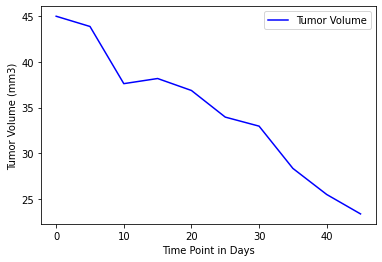

In [142]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Variables to plot 
tumor_y = mouse_s185["Tumor Volume (mm3)"]
timepoint_x = mouse_s185["Timepoint"]

# Line to be used 
plt.plot(timepoint_x, tumor_y, color = "blue", label = "Tumor Volume", linestyle = "solid")
plt.legend(loc="best")

# Titles and Labels 
plt.title = ("Mouse s185 Tumor Volume Over Time")
plt.xlabel ("Time Point in Days")
plt.xticks (np.arange(min(timepoint_x), max(timepoint_x) +1, 10))
plt.ylabel ("Tumor Volume (mm3)")
plt.show()


Text(0, 0.5, 'Tumor Volume (mm3)')

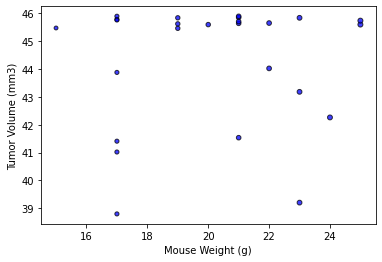

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average_cap = capomulin.groupby(["Mouse ID"]).mean()

average_tumor_volume = average_cap["Weight (g)"]
average_weight = average_cap ["Tumor Volume (mm3)"]

plt.scatter(average_tumor_volume, average_weight, marker = "o", facecolors = "blue", edgecolors= "black", s = average_tumor_volume, alpha = 0.75)
plt.title = ("Average Tumor Volume VS Mouse Weight")
plt.xlabel ("Mouse Weight (g)")
plt.ylabel ("Tumor Volume (mm3)")


## Correlation and Regression

In [159]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(average_tumor_volume,average_weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_tumor_volume, average_weight)
regression_values = average_tumor_volume * slope + intercept

print(f"Correlation: {round(correlation[1], 2)}")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-Value: {rvalue}")
print(f"P-Value: {pvalue}")
print(f"Standard Error: {stderr}")


Correlation: 0.77
Slope: 0.049027444031732925
Intercept: 43.279654241281534
R-Value: 0.06256727101066055
P-Value: 0.7663814578833255
Standard Error: 0.1630708726213997


In [160]:
#Putting regression values into dataframe for easier visualization  

reg_df = pd.DataFrame(regression_values)
reg_df = reg_df.rename(columns = {"Weight (g)": "Regression Value"})
reg_df.head()

,Regression Value
Mouse ID,
b128,44.358258
b742,44.309231
f966,44.113121
g288,44.211176
g316,44.358258


In [150]:
# Printing regression to make sure it matches the data frame 

#print(regression_values)

lin_equation = f"y = {round(slope , 2)}x + {round(intercept, 2)}"

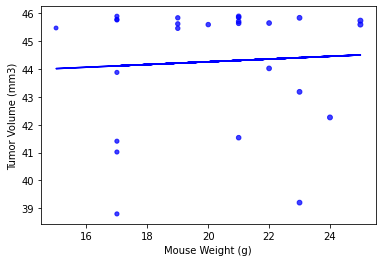

In [161]:
# Linear regression model with scatter plot 

plt.scatter(average_tumor_volume, average_weight, marker = "o", facecolors = "blue",  s = average_tumor_volume, alpha = 0.75)
plt.plot(average_cap["Weight (g)"],regression_values, color="blue")
plt.annotate( lin_equation,(5,10), fontsize = 10)
plt.title = ("Average Tumor Volume VS Mouse Weight")
plt.xlabel ("Mouse Weight (g)")
plt.ylabel ("Tumor Volume (mm3)")
plt.show()
